In [178]:
%matplotlib inline

In [215]:
from __future__ import print_function
import librosa
import matplotlib.pyplot as plt
import numpy as np

from os import listdir
from os.path import isfile, join

import urllib.request
import os.path

In [216]:
songs = [
	dict(url="https://geo-samples.beatport.com/lofi/7360812.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7342860.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7288700.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7365384.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7348192.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7275950.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7270846.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7270603.LOFI.mp3",label=1),
	dict(url="https://geo-samples.beatport.com/lofi/7248825.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7449815.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7335946.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7253770.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7312318.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7264105.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7346522.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7292843.LOFI.mp3",label=2),
	dict(url="https://geo-samples.beatport.com/lofi/7277074.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7301009.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7300695.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7333266.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7081480.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7387284.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7240081.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7337516.LOFI.mp3",label=3),
	dict(url="https://geo-samples.beatport.com/lofi/7366503.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/7312177.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/7381214.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/7405788.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/7365378.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/7312304.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/7394939.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/7225898.LOFI.mp3",label=4),
	dict(url="https://geo-samples.beatport.com/lofi/6966733.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7273291.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7312397.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7003815.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7338818.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7430262.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/6759296.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7165908.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7240595.LOFI.mp3",label=5),
	dict(url="https://geo-samples.beatport.com/lofi/7360974.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/7175758.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/7328834.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/7115878.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/7387279.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/6635329.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/7254574.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/7357840.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/7175757.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/6900365.LOFI.mp3",label=6),
	dict(url="https://geo-samples.beatport.com/lofi/6900810.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7295339.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7387048.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7022180.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7375728.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7333506.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7335690.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7202487.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7261898.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7254514.LOFI.mp3",label=7),
	dict(url="https://geo-samples.beatport.com/lofi/7309011.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7398139.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7295389.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7410101.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7267294.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7293730.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7348235.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7413711.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7343915.LOFI.mp3",label=8),
	dict(url="https://geo-samples.beatport.com/lofi/7336223.LOFI.mp3",label=8)
]

In [217]:
def download(url, path):
    path = path + url.split("/")[-1]
    
    if not os.path.isfile(path):
        urllib.request.urlretrieve (url, path)
    
    return path

def process(filename):
    y, sr = librosa.load(filename)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    
    return S

def cut(t, sample_size=512, index=0):
    rf = index * sample_size
    rt = (index + 1) * sample_size
    return t[:, rf:rt]

def cut_many(t, sample_size=512):
    r = t.shape[1]
    c = int(r / sample_size)
    
    return [cut(t, sample_size, i) for i in range(0,c)]
    

def save(path, t):
    np.save(path, t.T) # transpose while saving for more effective Torch calculations
    
    return path

def draw(spectrograms, titles = []):
    if type(spectrograms) is not list: spectrograms = [ spectrograms ]
    if type(titles) is not list: titles = [ titles ]
        
    for i, s in enumerate(spectrograms):
        plt.figure(i)
        fig = librosa.display.specshow(librosa.logamplitude(s,ref_power=np.max), y_axis='mel', fmax=100, x_axis='time')
        plt.title(titles[i] if len(titles) > i else "")

    plt.show()

In [214]:
def train_path(song, i):
    path = song["path"].replace("data/", "train/" + str(song["label"]) + "_" + str(i) + "_")
    return path

paths = [dict(path=download(song["url"], "data/"), label=song["label"]) for song in songs]

_ = [[save(train_path(path, i), s) for i, s in enumerate(cut_many(process(path["path"])))] for path in paths]

train/1_0_7360812.LOFI.mp3
train/1_1_7360812.LOFI.mp3
train/1_2_7360812.LOFI.mp3
train/1_3_7360812.LOFI.mp3
train/1_4_7360812.LOFI.mp3
train/1_5_7360812.LOFI.mp3
train/1_6_7360812.LOFI.mp3
train/1_7_7360812.LOFI.mp3
train/1_8_7360812.LOFI.mp3
train/1_9_7360812.LOFI.mp3
train/1_0_7342860.LOFI.mp3
train/1_1_7342860.LOFI.mp3
train/1_2_7342860.LOFI.mp3
train/1_3_7342860.LOFI.mp3
train/1_4_7342860.LOFI.mp3
train/1_5_7342860.LOFI.mp3
train/1_6_7342860.LOFI.mp3
train/1_7_7342860.LOFI.mp3
train/1_8_7342860.LOFI.mp3
train/1_9_7342860.LOFI.mp3
train/1_0_7288700.LOFI.mp3
train/1_1_7288700.LOFI.mp3
train/1_2_7288700.LOFI.mp3
train/1_3_7288700.LOFI.mp3
train/1_4_7288700.LOFI.mp3
train/1_5_7288700.LOFI.mp3
train/1_6_7288700.LOFI.mp3
train/1_7_7288700.LOFI.mp3
train/1_8_7288700.LOFI.mp3
train/1_9_7288700.LOFI.mp3
train/1_0_7365384.LOFI.mp3
train/1_1_7365384.LOFI.mp3
train/1_2_7365384.LOFI.mp3
train/1_3_7365384.LOFI.mp3
train/1_4_7365384.LOFI.mp3
train/1_5_7365384.LOFI.mp3
train/1_6_7365384.LOFI.mp3
t

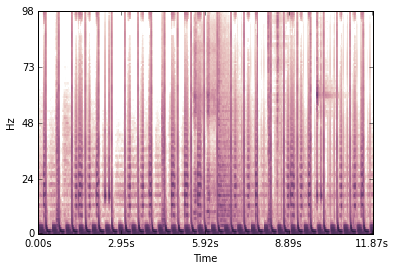

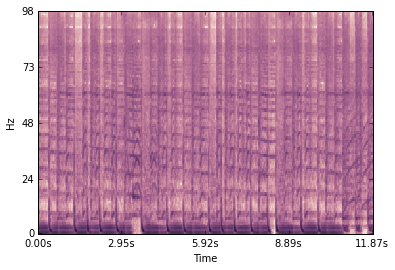

In [221]:
draw([
        np.load("train/3_6_7300695.LOFI.mp3.npy").T,
        np.load("train/5_4_6966733.LOFI.mp3.npy").T,
        np.load("train/        8_3_7343915.LOFI.mp3.npy").T

])

# draw([cut(v, 512, 0), cut(v, 512, 1), cut(v, 512, 2), cut(v, 2048, 0)])